In [1]:
!pip install kagglehub[pandas-datasets]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [4]:
file_path = "store.csv"
store_df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "pratyushakar/rossmann-store-sales",
    file_path
)
print(store_df.head())


/tmp/ipython-input-2074291206.py:2: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  store_df = kagglehub.load_dataset(


100%|██████████| 44.0k/44.0k [00:00<00:00, 1.42MB/s]

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [5]:
store_df = store_df.iloc[:,:3]
print(store_df)

      Store StoreType Assortment
0         1         c          a
1         2         a          a
2         3         a          a
3         4         c          c
4         5         a          a
...     ...       ...        ...
1110   1111         a          a
1111   1112         c          c
1112   1113         a          c
1113   1114         a          c
1114   1115         d          c

[1115 rows x 3 columns]


In [6]:
file_path = "train.csv"
data = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "pratyushakar/rossmann-store-sales",
    file_path
)
print(data)

/tmp/ipython-input-198919372.py:2: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  data = kagglehub.load_dataset(


         Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0 

/usr/local/lib/python3.11/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


In [7]:
print(data.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [8]:
open_stores = data["Open"].value_counts()
print(open_stores)

Open
1    844392
0    172817
Name: count, dtype: int64


In [9]:
df = pd.merge(data, store_df, on='Store', how='left')
print(df)

         Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  
0                  0              1         c          a  
1                

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df = df.sort_values(['Store', 'Date']).reset_index(drop=True)
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment
0,1,2,2013-01-01,0,0,0,0,a,1,c,a
1,1,3,2013-01-02,5530,668,1,0,0,1,c,a
2,1,4,2013-01-03,4327,578,1,0,0,1,c,a
3,1,5,2013-01-04,4486,619,1,0,0,1,c,a
4,1,6,2013-01-05,4997,635,1,0,0,1,c,a
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,1,2015-07-27,10712,608,1,1,0,1,d,c
1017205,1115,2,2015-07-28,8093,500,1,1,0,1,d,c
1017206,1115,3,2015-07-29,7661,473,1,1,0,1,d,c
1017207,1115,4,2015-07-30,8405,502,1,1,0,1,d,c


In [12]:
df.drop(['Customers'],axis=1,inplace=True)
df

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment
0,1,2,2013-01-01,0,0,0,a,1,c,a
1,1,3,2013-01-02,5530,1,0,0,1,c,a
2,1,4,2013-01-03,4327,1,0,0,1,c,a
3,1,5,2013-01-04,4486,1,0,0,1,c,a
4,1,6,2013-01-05,4997,1,0,0,1,c,a
...,...,...,...,...,...,...,...,...,...,...
1017204,1115,1,2015-07-27,10712,1,1,0,1,d,c
1017205,1115,2,2015-07-28,8093,1,1,0,1,d,c
1017206,1115,3,2015-07-29,7661,1,1,0,1,d,c
1017207,1115,4,2015-07-30,8405,1,1,0,1,d,c


In [13]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['Day'] = df['Date'].dt.day
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
df['Quarter'] = df['Date'].dt.quarter
df['DayOfYear'] = df['Date'].dt.dayofyear

In [14]:
df

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Year,Month,Week,Day,IsWeekend,Quarter,DayOfYear
0,1,2,2013-01-01,0,0,0,a,1,c,a,2013,1,1,1,0,1,1
1,1,3,2013-01-02,5530,1,0,0,1,c,a,2013,1,1,2,0,1,2
2,1,4,2013-01-03,4327,1,0,0,1,c,a,2013,1,1,3,0,1,3
3,1,5,2013-01-04,4486,1,0,0,1,c,a,2013,1,1,4,1,1,4
4,1,6,2013-01-05,4997,1,0,0,1,c,a,2013,1,1,5,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,1,2015-07-27,10712,1,1,0,1,d,c,2015,7,31,27,0,3,208
1017205,1115,2,2015-07-28,8093,1,1,0,1,d,c,2015,7,31,28,0,3,209
1017206,1115,3,2015-07-29,7661,1,1,0,1,d,c,2015,7,31,29,0,3,210
1017207,1115,4,2015-07-30,8405,1,1,0,1,d,c,2015,7,31,30,0,3,211


In [15]:
display(df.iloc[363])

,363
Store,1
DayOfWeek,1
Date,2013-12-30 00:00:00
Sales,7193
Open,1
Promo,0
StateHoliday,0
SchoolHoliday,1
StoreType,c
Assortment,a


In [16]:
label_cols = ["StateHoliday", "StoreType", "Assortment"]

for col in label_cols:
    le = LabelEncoder()
    if col == "StateHoliday":
      df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
df

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Year,Month,Week,Day,IsWeekend,Quarter,DayOfYear
0,1,2,2013-01-01,0,0,0,1,1,2,0,2013,1,1,1,0,1,1
1,1,3,2013-01-02,5530,1,0,0,1,2,0,2013,1,1,2,0,1,2
2,1,4,2013-01-03,4327,1,0,0,1,2,0,2013,1,1,3,0,1,3
3,1,5,2013-01-04,4486,1,0,0,1,2,0,2013,1,1,4,1,1,4
4,1,6,2013-01-05,4997,1,0,0,1,2,0,2013,1,1,5,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,1,2015-07-27,10712,1,1,0,1,3,2,2015,7,31,27,0,3,208
1017205,1115,2,2015-07-28,8093,1,1,0,1,3,2,2015,7,31,28,0,3,209
1017206,1115,3,2015-07-29,7661,1,1,0,1,3,2,2015,7,31,29,0,3,210
1017207,1115,4,2015-07-30,8405,1,1,0,1,3,2,2015,7,31,30,0,3,211


In [17]:
store_counts_df = df['Store'].value_counts().sort_index().reset_index()
store_counts_df.columns = ['Store', 'Count']
print(store_counts_df.head(20))


    Store  Count
0       1    942
1       2    942
2       3    942
3       4    942
4       5    942
5       6    942
6       7    942
7       8    942
8       9    942
9      10    942
10     11    942
11     12    942
12     13    758
13     14    942
14     15    942
15     16    942
16     17    942
17     18    942
18     19    942
19     20    758


In [18]:
print(df['StateHoliday'].value_counts())

StateHoliday
0    986159
1     20260
2      6690
3      4100
Name: count, dtype: int64


In [19]:
print(df['SchoolHoliday'].value_counts())

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64


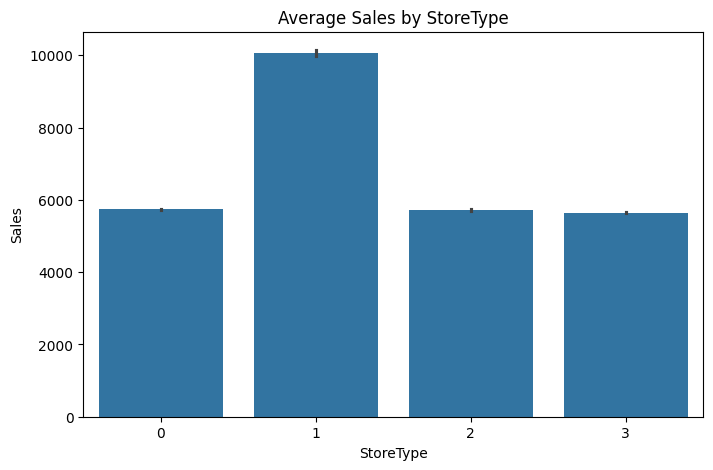

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x='StoreType', y='Sales', data=df, estimator='mean')
plt.title('Average Sales by StoreType')
plt.show()

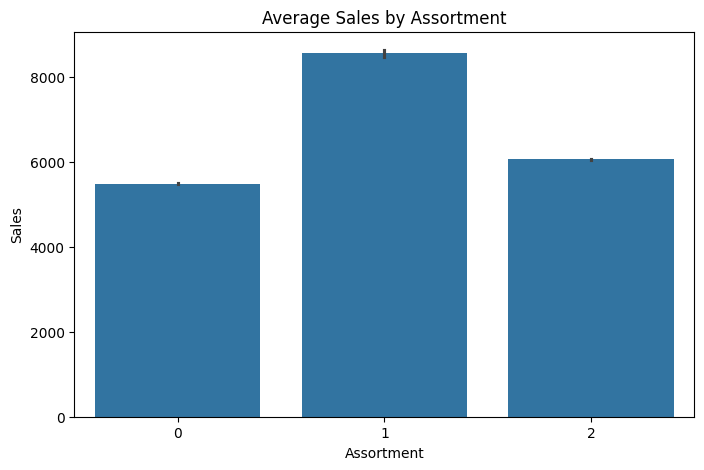

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x='Assortment', y='Sales', data=df, estimator='mean')
plt.title('Average Sales by Assortment')
plt.show()

In [22]:
grouped = df.groupby('Store')

lags = [1, 3, 7]
for lag in lags:
    df[f'lag_{lag}'] = grouped['Sales'].shift(lag)

# ---- ROLLING STAT FEATURES ----
windows = [3, 7]
for window in windows:
    df[f'rolling_mean_{window}'] = grouped['Sales'].shift(1).rolling(window).mean()
    df[f'rolling_std_{window}'] = grouped['Sales'].shift(1).rolling(window).std()
    df[f'rolling_max_{window}'] = grouped['Sales'].shift(1).rolling(window).max()
    df[f'rolling_min_{window}'] = grouped['Sales'].shift(1).rolling(window).min()
# Drop rows with NaN values caused by lag/rolling at the start
df = df.dropna().reset_index(drop=True)

print(df.head(15))

    Store  DayOfWeek       Date  Sales  Open  Promo  StateHoliday  \
0       1          2 2013-01-08   5580     1      1             0   
1       1          3 2013-01-09   5471     1      1             0   
2       1          4 2013-01-10   4892     1      1             0   
3       1          5 2013-01-11   4881     1      1             0   
4       1          6 2013-01-12   4952     1      0             0   
5       1          7 2013-01-13      0     0      0             0   
6       1          1 2013-01-14   4717     1      0             0   
7       1          2 2013-01-15   3900     1      0             0   
8       1          3 2013-01-16   4008     1      0             0   
9       1          4 2013-01-17   4044     1      0             0   
10      1          5 2013-01-18   4127     1      0             0   
11      1          6 2013-01-19   5182     1      0             0   
12      1          7 2013-01-20      0     0      0             0   
13      1          1 2013-01-21   

In [23]:
df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0
Assortment,0


In [24]:
features = df.drop(columns=['Sales', 'Date']).columns

target = 'Sales'


In [25]:
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

for store_id, store_df in df.groupby('Store'):
    store_df = store_df.sort_values('Date')
    split_index = int(len(store_df) * 0.8)  # 80% train, 20% test

    X_train_list.append(store_df.iloc[:split_index][features])
    X_test_list.append(store_df.iloc[split_index:][features])
    y_train_list.append(store_df.iloc[:split_index][target])
    y_test_list.append(store_df.iloc[split_index:][target])

# Combine all stores back
X_train = pd.concat(X_train_list, axis=0)
X_test = pd.concat(X_test_list, axis=0)
y_train = pd.concat(y_train_list, axis=0)
y_test = pd.concat(y_test_list, axis=0)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (807379, 26)
Testing set shape: (202025, 26)


In [26]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [27]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 901.401235577143
MAE: 590.1930541992188


In [28]:
# Group by date and store, then take mean
avg_sales_per_store_per_day = df.groupby(['Store', 'Date'])['Sales'].mean().mean()

print(f"Average Sales per Store per Day: {avg_sales_per_store_per_day:.2f}")


Average Sales per Store per Day: 5781.85


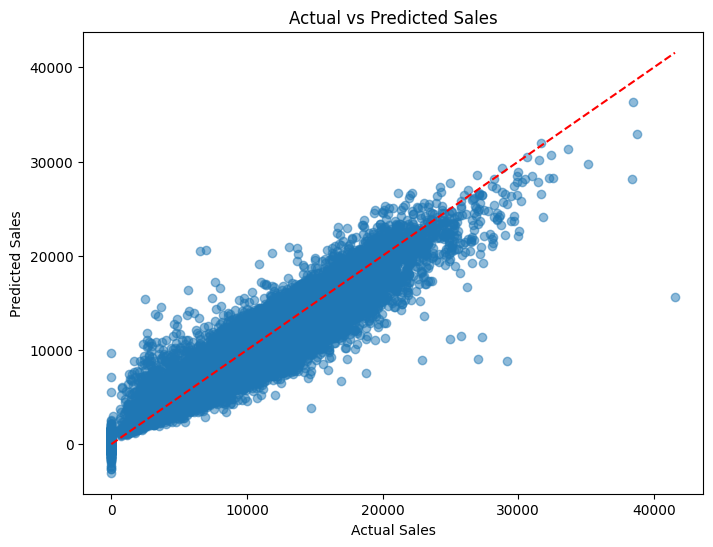

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Actual vs Predicted Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

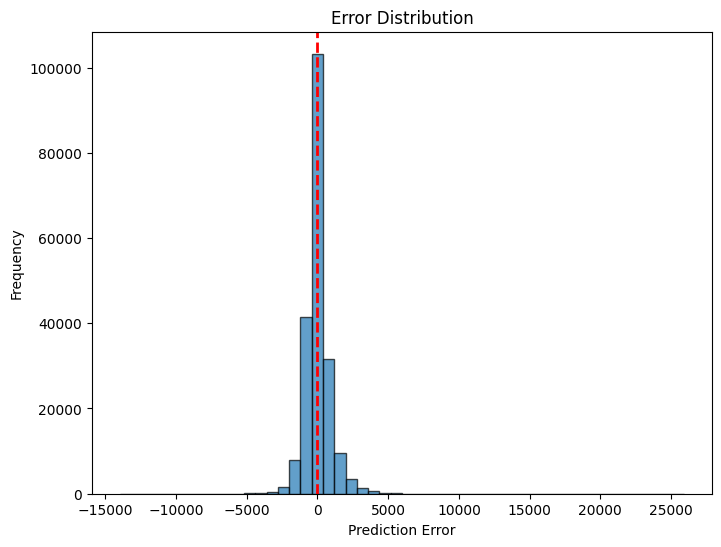

In [30]:
# 2️⃣ Error Distribution
errors = y_test - y_pred
plt.figure(figsize=(8,6))
plt.hist(errors, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()



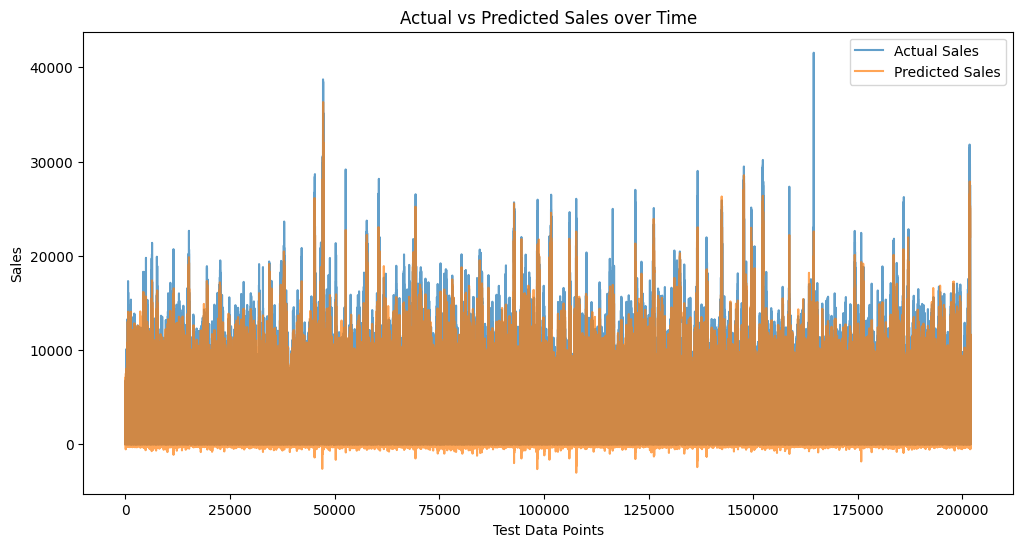

In [31]:
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), y_test, label="Actual Sales", alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label="Predicted Sales", alpha=0.7)
plt.xlabel("Test Data Points")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales over Time")
plt.legend()
plt.show()